# ECCO model files (ftp://ecco.jpl.nasa.gov/NearRealTime/)

## Near Real-Time Analyses
KalmanFilter (kf080): Kalman filter analysis
Smoother (dr080): RTS smoother analysis
Simulation (kf079): Simulation with no data assimilated

## Directory Structure 
Model results are archived first by year and then by quarter of the
year.  For instance, 1995 of run dr080 will be in directory
dr080_1995. Inside the directory for a given year, there are four
subdirectories corresponding to the four quarters of the year:
n10day_01_09, n10day_10_18, n10day_19_27, and n10day_28_37. For
instance, n10day_10_18 contains the results of the 10th to 18th 10-day
period of the year, i.e., day 90 to day 180 of year 1995. Note
n10day_28_37 contains results for day 270 to day 370 which is the 5th
day of the following year for non-leap years (4th day for leap years.)
The 37th 10-day mean is an average from year-day 360 to 370.

## File Naming Convention
Each subdirectory for a particular quarter of a particular year
contains both time-averaged fields and instantaneous fields. Naming
convention of the files is illustrated by the following examples:

Uave_08_08.02160_04320_240.cdf
U: Variable name (Zonal velocity)
ave: Time-averaged field. If no "ave", the field is an instantaneous field.
08_08: The run was conducted by using 8 by 8 tiled layout.
02160_04320: time span from time step 2160 to 4320. The model uses 1-hour time step.
   So the time span is from day 90 to day 180.
240: The time interval in time steps between time records. For time-averaged
   fields, the time interval is also the length in time steps of average period.
   For 1-hour time step, 240 time steps is 10-day.

H_08_08.02160_04320_012.cdf
H: Variable name (Sea level). Since there is no "ave" following "H", the field
   is an instantaneous field.
08_08: The run was conducted by using 8 by 8 tiled layout.
02160_04320: Time span from time step 2160 to 4320. The model has 1-hour time
   step. So the time span is from day 90 to day 180.
012: The time interval of in time steps between records. The 12 time steps is
   12-hour for 1-hour time step.

## Variables 

### 10-day average fields 
Save: Salinity (PSU)
Tave: Temperature (degC)
Uave: Zonal (east-west) velocity (m/s)
Vave: Meridional (north-south) velocity (m/s)
Wave: Vertical velocity (m/s)
Have: Sea level (m)

### 12-hourly instantaneous fields
H: Sea level (m)
OBP: Ocean bottom pressure (newton/meter^2)
OBPano: Ocean bottom pressure anomaly relative to the 1993-2009 time-mean of kf079 OBP (newton/meter^2)

### Hourly instantaneous fields
SBO_DIAG.data: The core products of the IERS Special Bureau for the Oceans. The files are in direct access 
   format with 11 variables per time record pertaining to earth rotation of that year;
   time: seconds from the beginning of the year.
   oceanic angular momentum due to currents x-dir: kg m^2/s  
   oceanic angular momentum due to currents y-dir: kg m^2/s  
   oceanic angular momentum due to currents z-dir: kg m^2/s  
   oceanic angular momentum due to pressure x-dir: kg m^2/s  
   oceanic angular momentum due to pressure y-dir: kg m^2/s  
   oceanic angular momentum due to pressure z-dir: kg m^2/s
   mass: kg
   center-of-mass of oceans x-dir: meter  
   center-of-mass of oceans y-dir: meter  
   center-of-mass of oceans z-dir: meter. 
   where the x-dir is from the center of the Earth to 0E, y-dir from the center of the
   Earth to 90E, and z-dir along the Earth's rotation axis.
SBO_DIAG.meta: meta data for SBO_DIAG.data	

### TS tendencies (30-day average fields)
EPrelaxAve: Surface relaxation of surface salt flux (psu/sec)
gs: Prefix for terms in the salinity budget (psu/sec)
gt: Prefix for terms in the temperature budget (degree/sec)
Extave: External forcing (includes penetrative components) 
Iceave: Forcing due to seaice formation
KFave: Forcing corresponding to Kalman filter corrections 
KPPave: Forcing due to KPP mixing	
Relaxave: Forcing due to surface relaxation	
Uave: Forcing due to U advection
Vave: Forcing due to V advection
Wave: Forcing due to W advection
Xdiffave: Forcing due to zonal diffusion
Ydiffave: Forcing due to meridional diffusion	
ZdiffGMave: Forcing due to vertical component of GM diffusion	
Zdiffave: Forcing due to implicit or explicit vertical diffusion


In [2]:
import sys
import numpy as np
from netCDF4 import Dataset
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cmocean

In [3]:
# test Uave velocity file
# 10-d average 46 depth levels  (grid: 224 x 360)
datafile = 'Uave_08_08.06480_08880_240.cdf'

f = Dataset(datafile)
uavg = f['Uave']

lon = f['lon']
lat = f['lat']
depth = f['depth']


datafile = 'Vave_08_08.06480_08880_240.cdf'
f2 = Dataset(datafile)
vavg = f2['Vave']

In [4]:
print(f)
print(uavg)
print(vavg)
print(depth)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: kf079
    history: Converted from MITGCM output on 02/21/2018

    dimensions(sizes): time(10), depth(46), lat(224), lat_v(224), lon(360), lon_u(360)
    variables(dimensions): float32 lat(lat), float32 lat_v(lat_v), float32 lon(lon), float32 lon_u(lon_), float32 depth(depth), float32 time(time), float32 Uave(time,depth,lat,lon_)
    groups: 

<class 'netCDF4._netCDF4.Variable'>
float32 Uave(time, depth, lat, lon_u)
    units: M/S
    long_name: Zonal Velocity
    missing_value: -10000000000.0
    add_offset: 0.0
    scale_factor: 1.0
unlimited dimensions: time
current shape = (10, 46, 224, 360)
filling on, default _FillValue of 9.969209968386869e+36 used

<class 'netCDF4._netCDF4.Variable'>
float32 Vave(time, depth, lat_v, lon)
    units: M/S
    long_name: Meridional Velocity
    missing_value: -10000000000.0
    add_offset: 0.0
    scale_factor: 1.0
unlimited dimensions: time


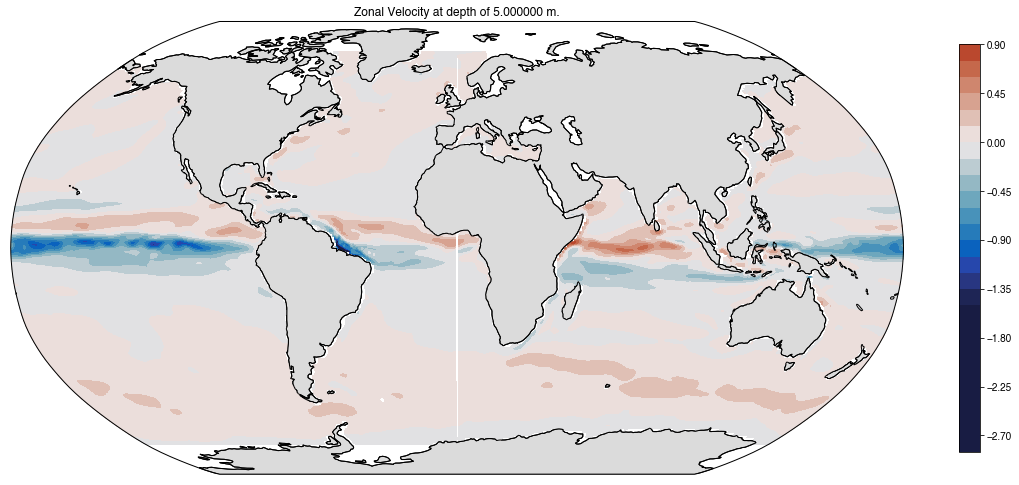

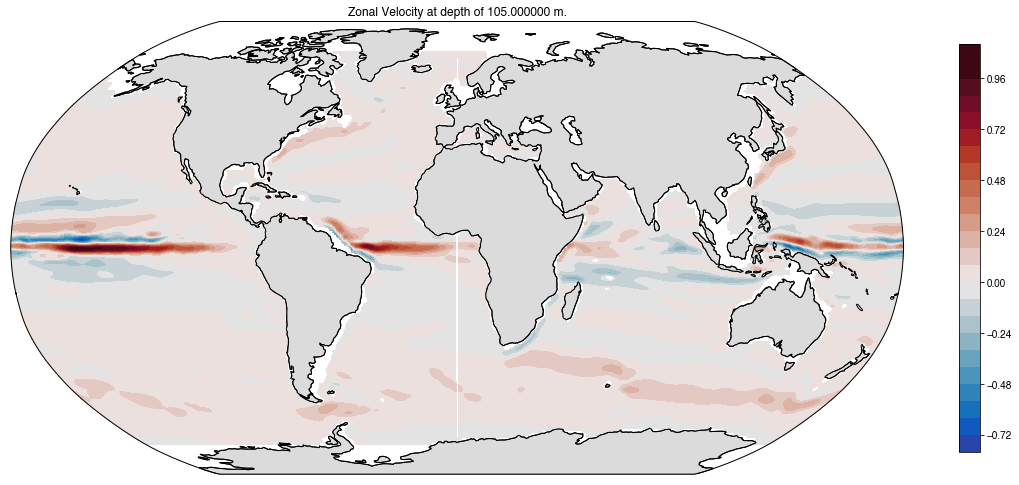

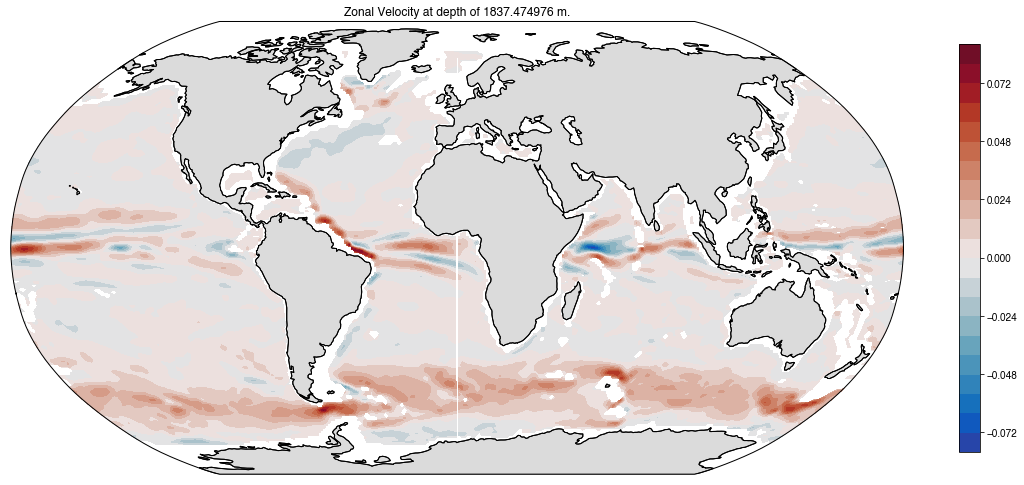

In [5]:
max_values = [1.5, 1, 0.1]

# loop different depth level
for i, did in enumerate([0, 10, 35]):
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    lons, lats = np.meshgrid(lon, lat)
    cs1 = ax.contourf(lons, lats, uavg[0,did,:,:], 25, transform=ccrs.PlateCarree(), cmap=cmocean.cm.balance, vmin=-max_values[i], vmax=max_values[i])
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', facecolor=cfeature.COLORS['land_alt1'])
    ax.coastlines()
    ax.set_global()
    ax.set_title('Zonal Velocity at depth of %f m.' % (depth[did]))
    cbar = fig.colorbar(cs1, shrink=0.5) # colorbar is off but I'm tired of this shit

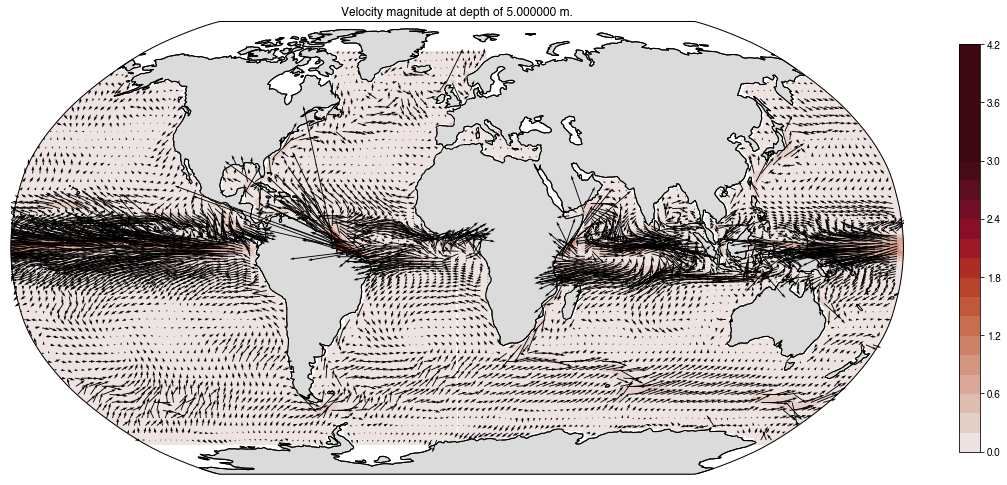

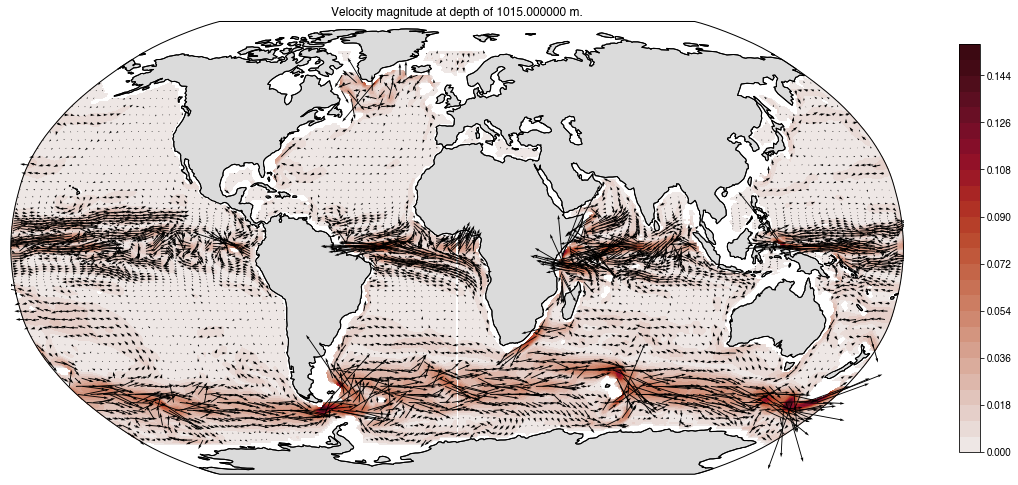

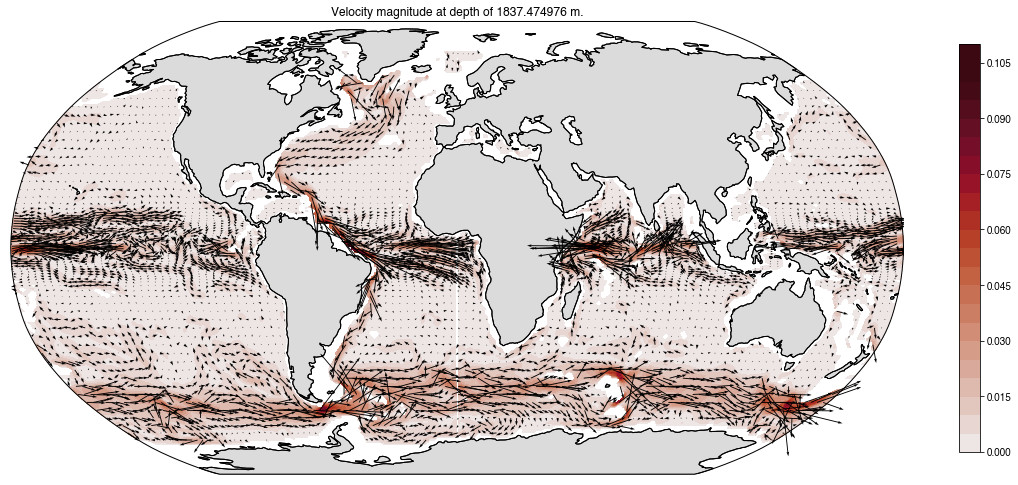

In [13]:
def norm_v_masked(u, v):
    uv = np.zeros_like(u)
    mask = np.logical_or(u.mask, v.mask)
    uv[~mask] = np.sqrt(u[~mask]**2 + v[~mask]**2)
    return uv

# argo plot
did = 29
max_values = [3, 0.15, 0.1]
scales = [10, 1.5, 1.0]
skip = 3
lons, lats = np.meshgrid(lon, lat)

for i, did in enumerate([0, 29, 35]):
    fig = plt.figure(figsize=(20, 15))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
    mag_v = norm_v_masked(uavg[0,did,:,:], vavg[0,did,:,:])
    cs1 = ax.contourf(lons, lats, mag_v, 25, transform=ccrs.PlateCarree(), cmap=cmocean.cm.amp, vmin=0, vmax=max_values[i])
    ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black', facecolor=cfeature.COLORS['land_alt1'])
    ax.coastlines()
    ax.set_global()
    ax.set_title('Velocity magnitude at depth of %f m.' % (depth[did]))
    cbar = fig.colorbar(cs1, shrink=0.5) # colorbar is off but I'm tired of this shit
    Q = ax.quiver(lons[::skip,::skip], lats[::skip,::skip], uavg[0,did,::skip,::skip], vavg[0,did,::skip,::skip], transform=ccrs.PlateCarree(), units='width', width=0.001, scale=scales[i])
    #ax.set_extent([-96, 10, 0, 70])